In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap.pyproj as pyproj
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

In [3]:
# data = pd.read_excel(r'../data/TNC_time_transit_with distance.xlsx')
# data.head()

In [4]:
# #reportject data
# wgs84=pyproj.Proj("+init=EPSG:4326")
# UTM = pyproj.Proj("+init=EPSG:2385")

In [5]:
# weight = pd.read_excel(r'../data/TNC_panel_weight.xlsx')
# weight.index = weight['month']
# weight['share_adjusted'] = weight['share (Jan=1)']/weight['share (Jan=1)'].max()
# weight

In [6]:
def resample(original_data, weight, month):
#     original_data: the original DiDi data we get;
#     weight: the weight for resample the data;
#     the month we want do the resampling
    sub_data = original_data[original_data['month']==month]
    sample = sub_data.sample(frac = float((weight.loc[month,'share_adjusted'])), replace=False,random_state=1)
    return sample

In [7]:
# data_re = pd.DataFrame()
# for i in range(1,11):
#     data_re = data_re.append(resample(data,weight,i))
# data_re.head()

In [8]:
# data_re['dest_xx'],data_re['dest_yy'] = pyproj.transform(wgs84, UTM, data_re['dest_lng'].as_matrix(),data_re['dest_lat'].as_matrix())
# data_re['starting_xx'],data_re['starting_yy'] = pyproj.transform(wgs84, UTM, data_re['starting_lng'].as_matrix(),data_re['starting_lat'].as_matrix())
# data_re.head()

140854
140852


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,FID,id_match,month,day_of_week,starting_lng,starting_lat,dest_lng,...,start_hour,end_clock,end_hour,travel time,begin_date,finish_date,dest_xx,dest_yy,starting_xx,starting_yy
0,0,21492,21492,21492,121493,1,6,121.407162,31.164013,121.398444,...,19.971389,20:13:11,20.219722,14.900000,2015-01-06 19:58:17,2015-01-06 20:13:11,633279.691491,3454337.296290,634165.781093,3450012.881966
1,1,9488,9488,9488,109489,1,5,121.486184,31.204386,121.456390,...,14.688611,14:53:52,14.897778,12.550000,2015-01-05 14:41:19,2015-01-05 14:53:52,638805.276650,3454222.080772,641640.755653,3454588.325301
2,2,16933,16933,16933,116934,1,1,121.494585,31.245437,121.463608,...,1.025278,01:26:48,1.446667,25.283333,2015-01-01 01:01:31,2015-01-01 01:26:48,639479.248300,3455290.940158,642379.925657,3459151.304367
3,3,12604,12604,12604,112605,1,6,121.399155,31.198053,121.358284,...,18.818889,19:24:38,19.410556,35.500000,2015-01-06 18:49:08,2015-01-06 19:24:38,629431.615266,3455938.479563,633354.549795,3453777.834504
4,4,8222,8222,8222,108223,1,1,121.480010,31.225719,121.458138,...,22.200833,22:22:46,22.379444,10.716667,2015-01-01 22:12:03,2015-01-01 22:22:46,638951.075856,3455802.461066,641020.605697,3456946.058040


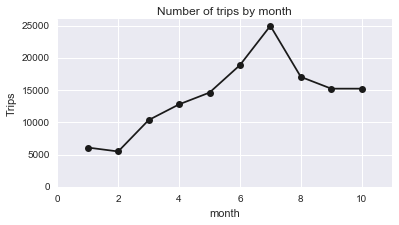

In [9]:
data_re = pd.read_csv(r'../data/TNC_time_transit_with distance_resample.csv')
print(len(data_re.index))
data_re = data_re.replace([np.inf, -np.inf], np.nan)
data_re = data_re.dropna()
print(len(data_re.index))
plt.figure(figsize=(6,3))
ax = data_re.groupby('month').count()['FID'].plot(style ='ko-')
ax.set_title('Number of trips by month')
ax.set_ylabel('Trips')
ax.set_ylim(0,26000)
ax.set_xlim(0,11)
plt.savefig(r'../plots/total_number_trips',dpi=300,bbox_inches='tight')
data_re.head()
# data_re.to_csv(r'../data/TNC_time_transit_with distance_resample.csv')

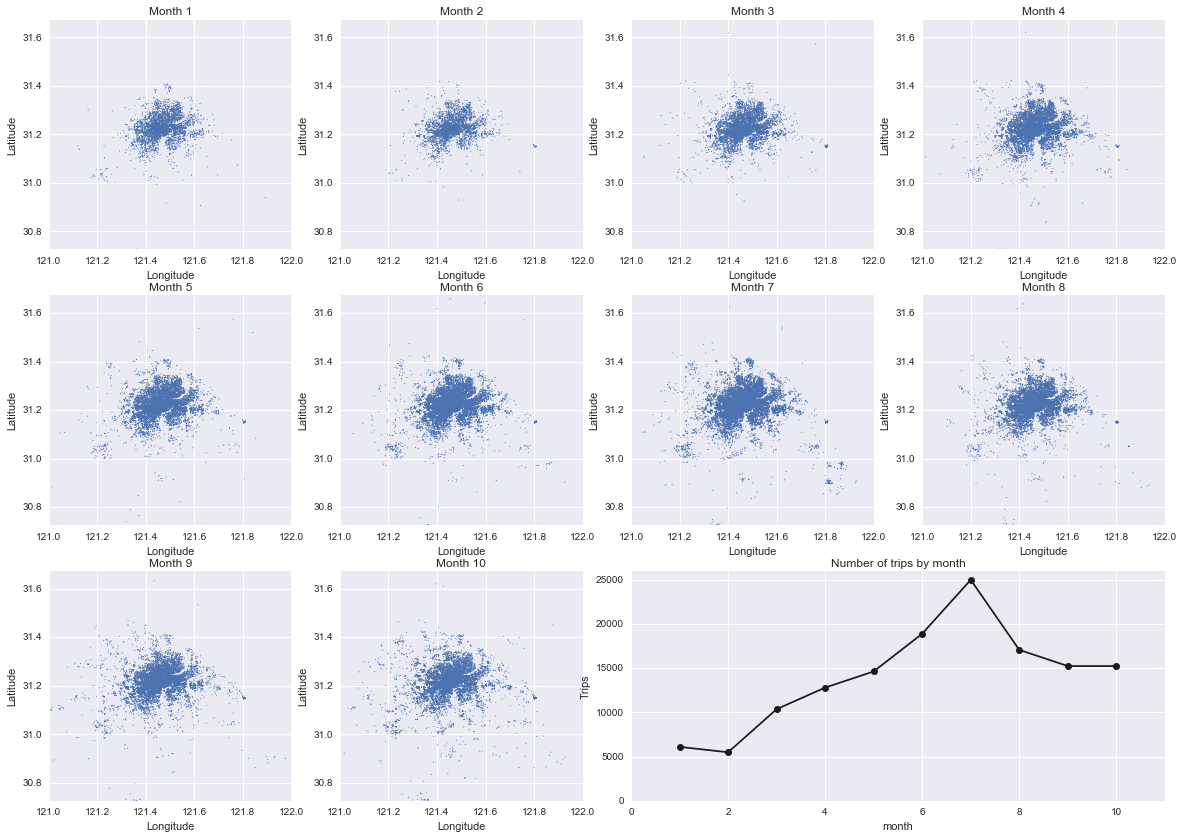

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,14))
for i in range(1,11): 
#     ax = data_re[data_re['month']==i].plot(x= 'dest_lng',y = 'dest_lat',kind = 'scatter',figsize = (5,10))
    ax = data_re[data_re['month']==i].plot(x="dest_lng", y="dest_lat",kind="scatter",ax = axes[int((i-1)/4),(i-1)%4],s=1,edgecolors='None');
#     data_re[data_re['month']==i].to_csv(r'../data/resampled_%s.csv'%i)
    ax.set_title('Month %s'%i)
    ax.axis('equal')
    ax.set_xlim(121,122)
    ax.set_ylim(30.9,31.5)  
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
ax2 = plt.subplot2grid((3,4), (2, 2),colspan=2)
data_re.groupby('month').count()['FID'].plot(style ='ko-',ax = ax2)
ax2.set_title('Number of trips by month')
ax2.set_ylabel('Trips')
ax2.set_ylim(0,26000)
ax2.set_xlim(0,11)
# fig.suptitle('Destination points',fontsize = 14)
fig.savefig(r'../plots/destination_points',dpi=300,bbox_inches='tight')
#     ax.axis('equal')

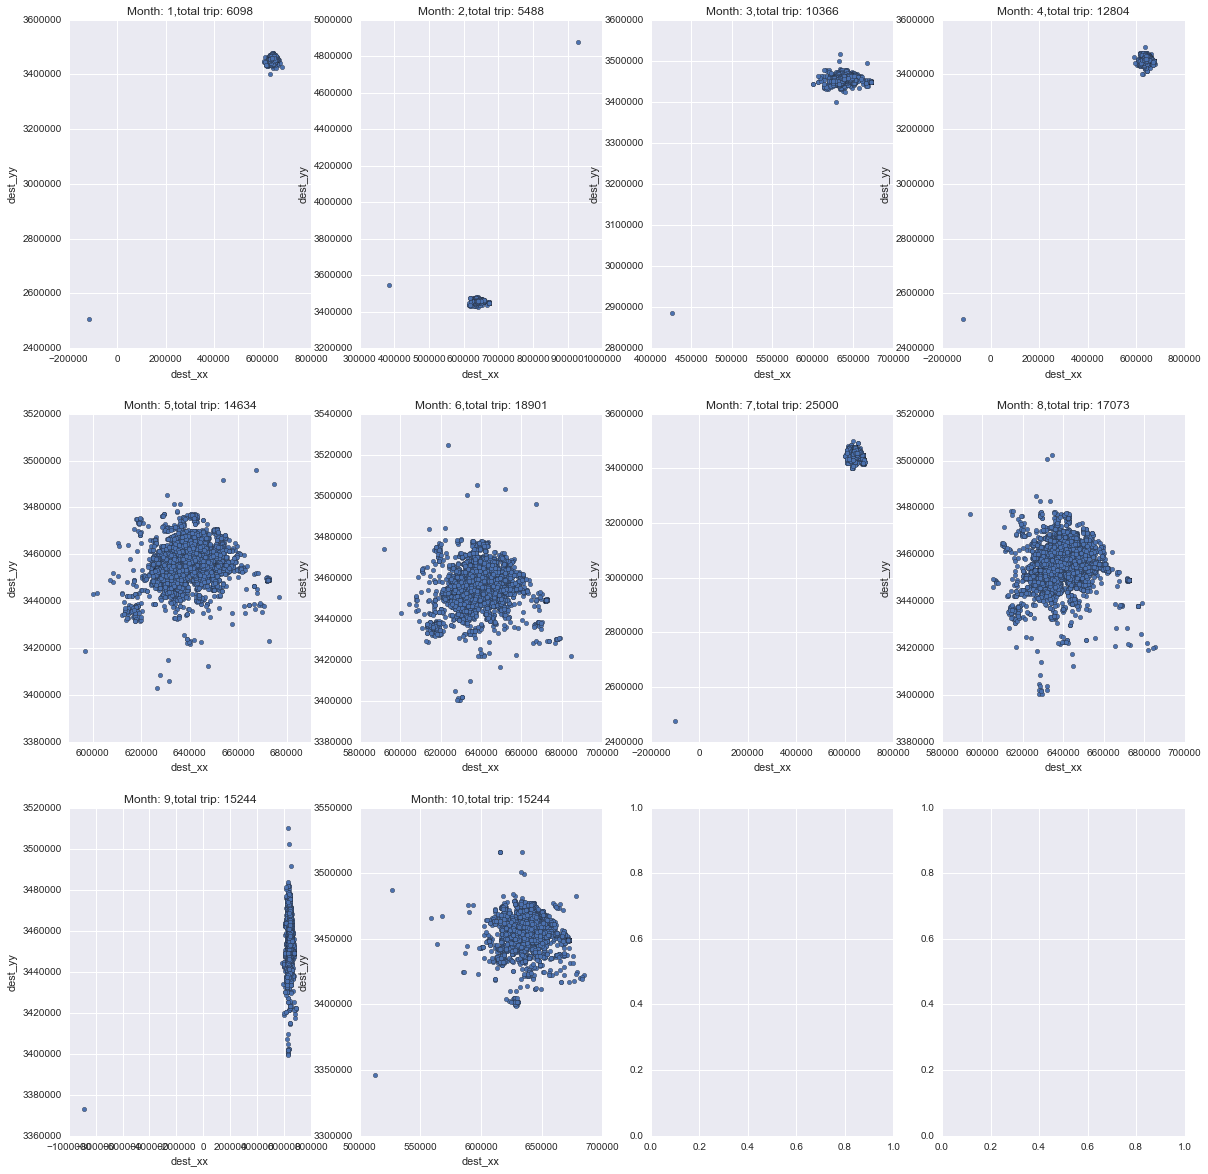

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,20))
for i in range(1,11):
    
#     ax = data_re[data_re['month']==i].plot(x= 'dest_lng',y = 'dest_lat',kind = 'scatter',figsize = (5,10))
    ax = data_re[data_re['month']==i].plot(x="dest_xx", y="dest_yy",kind="scatter",ax = axes[int((i-1)/4),(i-1)%4]);
    ax.set_title('Month: %s,total trip: %s'%(i,len(data_re[data_re['month']==i].index)))

### let's run dbscan

In [12]:
# define the DBSCAN parameters
eps = 200
min_samples = 2

In [13]:
# run the dbscan clustering
def db(sub,eps,min_samples,od):
    X = sub[[od+'_xx',od+'_yy']].as_matrix()
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    core_sample = db.core_sample_indices_
    return labels,n_clusters_, core_sample
#     core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#     core_samples_mask[db.core_sample_indices_] = True

In [14]:
data_re['label_starting']=pd.Series()
data_re['label_dest']=pd.Series()
cluster_number = pd.DataFrame()
cluster_number['month']=list(set(data_re['month'].tolist()))
cluster_number.index=cluster_number['month']

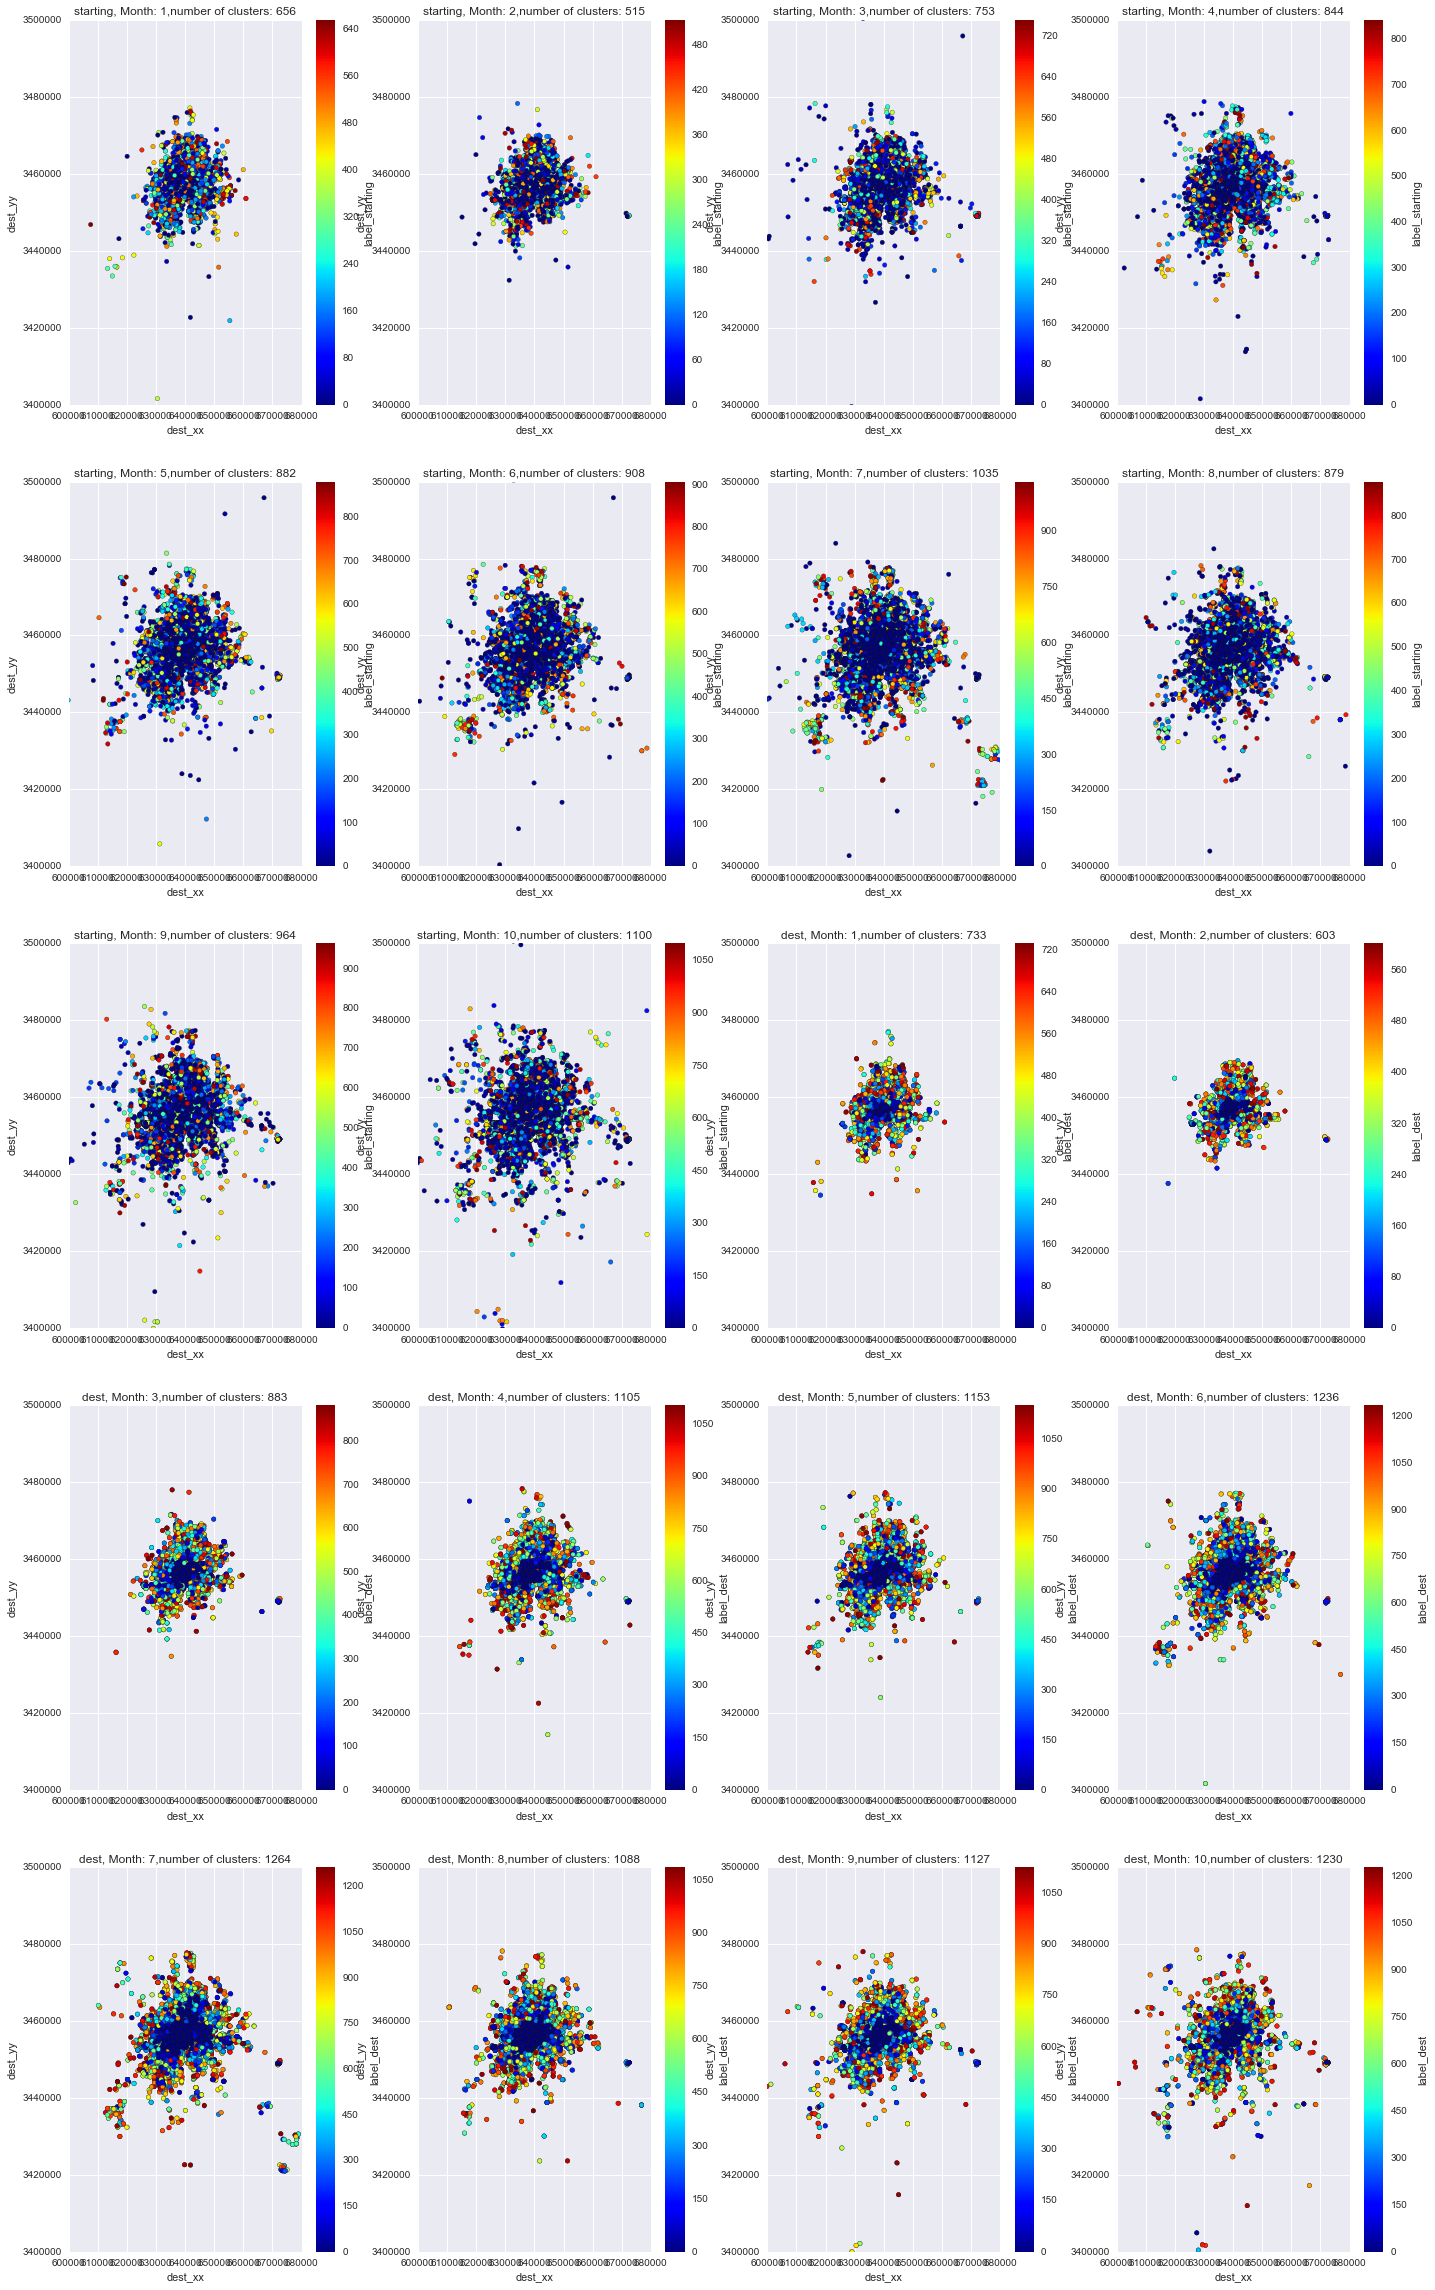

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(24,40))
for i in range(1,11):
    od = 'starting'
    sub = data_re.loc[data_re['month']==i]
    labels, n_clusters_, core_sample= db(sub,eps,min_samples,od)
    data_re.loc[data_re['month']==i,'label_%s'%od]=labels
    cluster_number.loc[cluster_number['month']==i,od]=n_clusters_
    cluster_number.loc[cluster_number['month']==i,'trips'] = data_re.groupby('month').count().loc[i,'FID']
    sub = data_re.loc[data_re['month']==i]
    #######
    ax = sub[sub['label_%s'%od]!=-1].plot(x='dest_xx',y='dest_yy',kind='scatter',c='label_%s'%od,colormap='jet',ax = axes[int((i-1)/4),(i-1)%4]);
    ax.set_title('%s, Month: %s,number of clusters: %s'%(od,i,n_clusters_))
    ax.set_xlim(600000, 680000)
    ax.set_ylim(3400000,3500000)
    #######################################################################
    od = 'dest'
    labels, n_clusters_, core_sample = db(sub,eps,min_samples,od)
    data_re.loc[data_re['month']==i,'label_%s'%od]=labels
    cluster_number.loc[cluster_number['month']==i,od]=n_clusters_
    sub = data_re.loc[data_re['month']==i]
    ########
    ax = sub[sub['label_%s'%od]!=-1].plot(x='dest_xx',y='dest_yy',kind='scatter',c='label_%s'%od,colormap='jet',ax = axes[int((i+10-1)/4),(i+10-1)%4]);
    ax.set_title('%s, Month: %s,number of clusters: %s'%(od,i,n_clusters_))
    ax.set_xlim(600000, 680000)
    ax.set_ylim(3400000,3500000)
data_re.to_csv(r'../data/TNC_time_transit_with distance_resample_with_db_labels.csv')
# use the silhouette_score to indiciate how well the clustering works, closer to 1 is better
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

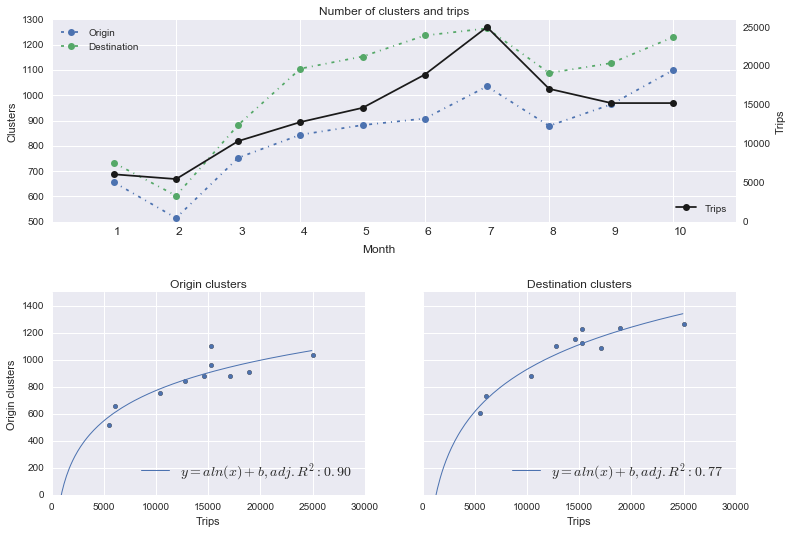

In [28]:
## summary stats about the clusters
## temporal change of number of clusters

from random import randint
x=[randint(0,25000) for p in range(0,300)]
x.sort()
cluster_reg = pd.DataFrame(x,columns =['Trips'])
import statsmodels.formula.api as sm
result1 = sm.ols(formula="dest ~ np.log(trips)", data=cluster_number).fit()
cluster_reg['dest_ols'] = result1.predict(pd.DataFrame({'intercept': 1, 'trips': x}))

result2 = sm.ols(formula="starting ~ np.log(trips)", data=cluster_number).fit()
cluster_reg['starting_ols'] = result2.predict(pd.DataFrame({'intercept': 1, 'trips': x}))
### plot
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (10,7))
plt.tight_layout(pad=0.4, w_pad=3, h_pad=5)
ax1 = plt.subplot2grid((2,2), (0, 0),colspan=2)
cluster_number.plot(x=cluster_number.index,y = ['starting','dest'],style = '-.o',title='Number of clusters and trips',label='Origin',ax= ax1)
cluster_number['trips'].plot(secondary_y = True,style = 'k-o',label='Trips',ax = ax1,sharex=True)
ax1.legend(['Origin','Destination'],loc=2)
ax1.right_ax.legend(['Trips'],loc = 4)
ax1.set_xlim([0,11])
ax1.right_ax.set_ylim([0,26000])
ax1.set_ylabel('Clusters')
ax1.grid(True)
ax1.right_ax.grid(False)
ax1.right_ax.set_xlim([0,11])
ax1.right_ax.set_ylabel('Trips')
for mon in range(1,11):
    ax1.text(mon, 450, mon, fontsize=12)
ax1.text(5,380,'Month',fontsize=12)


cluster_number.plot(x='trips',y = 'starting',kind = 'scatter',ax = axes[1,0],title = 'Origin clusters',sharey = True)
cluster_number.plot(x='trips',y = 'dest',kind = 'scatter',ax = axes[1,1],title = 'Destination clusters')
cluster_reg.plot(x='Trips',y = 'starting_ols',ax = axes[1,0],linewidth= 1,legend =False)
cluster_reg.plot(x='Trips',y = 'dest_ols',ax = axes[1,1],linewidth= 1,legend =False)
axes[1,0].set_xlim([0,30000])
axes[1,0].set_ylim([0,1500])
axes[1,0].set_xlabel('Trips')
axes[1,0].set_ylabel('Origin clusters')
axes[1,0].legend(['$y = aln(x)+b, adj. R^2:%.2f$'%result1.rsquared_adj],loc = 4,fontsize =14)
axes[1,1].set_xlim([0,30000])
axes[1,1].set_ylim([0,1500])
axes[1,1].set_xlabel('Trips')
axes[1,1].set_ylabel('Destination clusters')
axes[1,1].legend(['$y = aln(x)+b, adj. R^2:%.2f$'%result2.rsquared_adj],loc = 4,fontsize =14)
# # cluster_number.plot(x='trips',y = 'dest',kind = 'scatter',style ='k',ax = axes[0,1],title = 'Relationship between number of origin and destination clusters')
# # cluster_number.plot(x='starting',y='dest_ols',ax = axes[0,1],linewidth =1)
# ax2.legend(['Linear fit'],loc=2)
# ax2.set_xlabel('Number of origin clusters')
# ax2.set_ylabel('Number of destination clusters')
fig.savefig(r'../plots/number_of_clusters',dpi=300,bbox_inches='tight')

In [17]:
result1.summary()

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dest   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     83.82
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           1.63e-05
Time:                        17:10:54   Log-Likelihood:                -55.684
No. Observations:                  10   AIC:                             115.4
Df Residuals:                       8   BIC:                             116.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept     -3221.6037    466.262     -6.909      0.000     -4296.806 -2146.402
np.log(trips)   450.7017     49.229      9.155      0.000       337.180   564.224
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.670
Skew:                           0.121   Prob(JB):                        0.715
Kurtosis:                       1.755   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

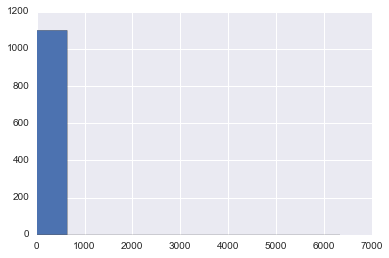

In [18]:
mem_start = data_re[data_re['label_starting']!=-1]
size = mem_start[mem_start['month']==10].groupby('label_starting').count()['starting_xx']
size.hist()

In [19]:
mem_start = data_re[data_re['label_starting']!=-1]
size = mem_start[mem_start['month']==10].groupby('label_starting').count()['starting_xx']
size.describe()

count    1100.000000
mean       12.252727
std       192.262729
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max      6345.000000
Name: starting_xx, dtype: float64

alpha=  1.4980456307   sigma=  0.0150166407773


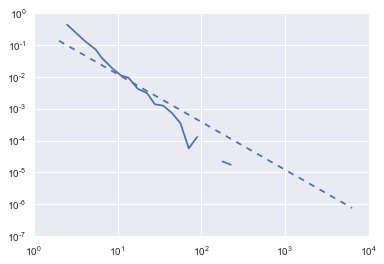

In [20]:
import powerlaw
fit = powerlaw.Fit(size,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

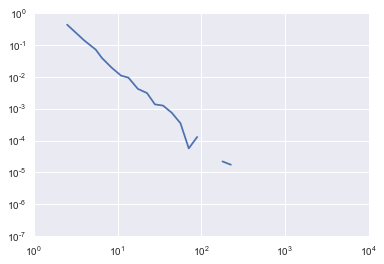

In [21]:
powerlaw.plot_pdf(size)